In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [122]:
# DATA LOADING
X = pd.read_csv('cStick.csv')
X.columns = ['Distance', 'Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer','Decision']
y = X['Decision']
X = X.drop('Decision', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
# NORMALIZATION USING MIN-MAX SCALER
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PRINT DATA TABLES
print(X_train)


[[0.22863349 0.5        0.52939366 0.1890214  0.57514379 1.        ]
 [0.32508824 0.5        0.60557094 0.2687648  0.65953988 1.        ]
 [0.85537503 0.         0.23022468 0.38454041 0.87771943 0.        ]
 ...
 [0.15489919 0.5        0.47116036 0.128062   0.51062766 1.        ]
 [0.26378588 0.5        0.55715605 0.21808344 0.60590148 1.        ]
 [0.37138652 0.5        0.64213604 0.30704164 0.70005001 1.        ]]


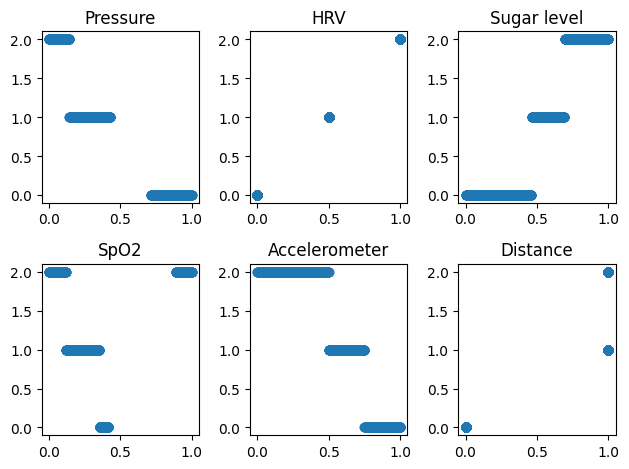

In [124]:
# FEATURE RELEVANCE TESTING
fig, axs = plt.subplots(2, 3)
axs[0, 0].scatter(X_train[:,0], y_train)
axs[0, 0].set_title('Pressure')
axs[0, 1].scatter(X_train[:,1], y_train)
axs[0, 1].set_title('HRV')
axs[0, 2].scatter(X_train[:,2], y_train)
axs[0, 2].set_title('Sugar level')
axs[1, 0].scatter(X_train[:,3], y_train)
axs[1, 0].set_title('SpO2')
axs[1, 1].scatter(X_train[:,4], y_train)
axs[1, 1].set_title('Accelerometer')
axs[1, 2].scatter(X_train[:,5], y_train)
axs[1, 2].set_title('Distance')
plt.tight_layout()
plt.show()

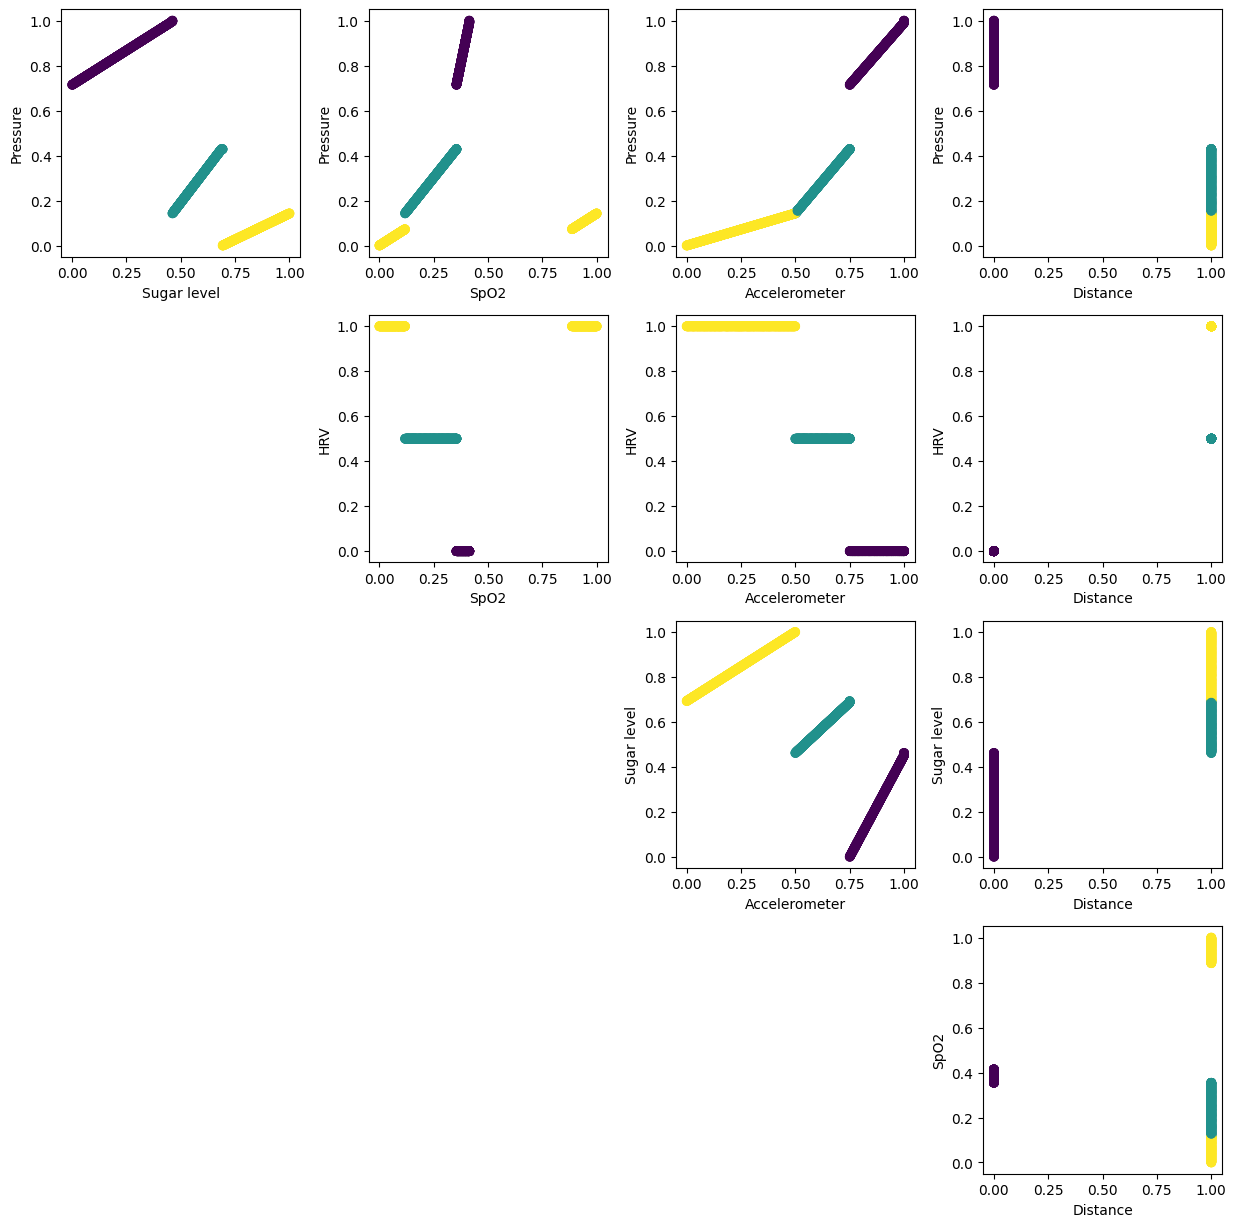

In [125]:
# VISUALIZING FEATURE PAIR RELATIONSHIPS
features = ['Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer', 'Distance']
fig, axs = plt.subplots(len(features)-1, len(features)-1, figsize=(15, 15))

for i in range(len(features)-1):
    for j in range(i+1, len(features)):
        axs[i, j-1].scatter(X_train[:,j], X_train[:,i], c=y_train)
        axs[i, j-1].set_xlabel(features[j])
        axs[i, j-1].set_ylabel(features[i])

# remove empty plots
for i in range(len(features)-1): 
    for j in range(i+1, len(features)): axs[j-1, i].remove()
plt.tight_layout() 


In [126]:
# remove HRV feature from X_train and X_test
# X_train = np.delete(X_train, 1, 1)
# X_test = np.delete(X_test, 1, 1)
# Removing HRV (1:1 correlation with decision label, does not affect the results)

# LINEAR REGRESSION MODEL
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)

# K-MEANS CLUSTERING MODEL
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(X_train)
y_pred_kmeans = kmeans.predict(X_test)

# RANDOM FOREST CLASSIFIER
X_train, y_train = make_classification(n_samples=len(X_train), n_features=6,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=4, random_state=0, criterion='gini')
clf.fit(X_train, y_train)
y_pred_forest = clf.predict(X_test)


In [127]:
# EVALUATION
# Linear model
print("Classes: {0: No fall detected, 1: Slip detected, 2: Definite Fall}")
print('Columns in confusion matrix represent predicted values and rows represent actual values')

print("Linear Model Evaluation")
print('MSE:', mean_squared_error(y_test, y_pred_linear))
# print confusion matrix
y_pred_linear = np.round(y_pred_linear)
print('Confusion matrix: \n',confusion_matrix(y_test, y_pred_linear, labels=[0, 1, 2]))

# K-means model
print('\nK-means clustering Evaluation')
print('MSE:', mean_squared_error(y_test, y_pred_kmeans))
print('Confusion matrix: \n',confusion_matrix(y_test, y_pred_kmeans, labels=[0, 1, 2]))

# Random forest model
print('\nRandom Forest Evaluation')
print('MSE:', mean_squared_error(y_test, y_pred_forest))
print(clf.score(X_test, y_test))
print('Confusion matrix: \n',confusion_matrix(y_test, y_pred_forest, labels=[0, 1, 2]))

Classes: {0: No fall detected, 1: Slip detected, 2: Definite Fall}
Columns in confusion matrix represent predicted values and rows represent actual values
Linear Model Evaluation
MSE: 7.062822692647614e-31
Confusion matrix: 
 [[142   0   0]
 [  0 128   0]
 [  0   0 138]]

K-means clustering Evaluation
MSE: 0.17892156862745098
Confusion matrix: 
 [[142   0   0]
 [  0 128   0]
 [  0  73  65]]

Random Forest Evaluation
MSE: 0.6862745098039216
0.3137254901960784
Confusion matrix: 
 [[  0 142   0]
 [  0 128   0]
 [  0 138   0]]
